In [1]:
# Import useful dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo.

from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps.

from datetime import datetime
from datetime import date

In [2]:
# Import the csv file containing the companies in the S&P500.

companies_df = pd.read_csv("sp500/sp500_companies.csv")
companies_df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,159.59,2675494354944,1.282180e+11,0.112,Cupertino,CA,United States,100000.0,"Apple Inc. designs, manufactures, and markets ...",0.065893
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,294.39,2210274213888,8.574500e+10,0.220,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.054436
2,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2665.61,1820760997888,9.114400e+10,0.324,Mountain View,CA,United States,156500.0,Alphabet Inc. provides online advertising serv...,0.044842
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2673.81,1814979543040,9.114400e+10,0.324,Mountain View,CA,United States,156500.0,Alphabet Inc. provides online advertising serv...,0.044700
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,3062.08,1558121021440,5.917500e+10,0.094,Seattle,WA,United States,1608000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038374


In [3]:
# Examine COVID 19 recession timeframe:

COVID_start = datetime(2020,2,1)
COVID_end = datetime(2020,4,1)

sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S_P500", "Financials","Consumer_Discretionary","Consumer_Staples","Health","Industrials","Information_Tech","Materials","Real_Estate","Tele_Services","Utilities","Energy"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

# Extract data for each sector from Yahoo Finance and export it to its own CSV file.

for sector in sector_list: 
    file_name=str(sector)+".csv"
    thisyear[sector_list.index(sector)] = globals()[sector] = yf.download(sector, COVID_start, COVID_end)
    thisyear[sector_list.index(sector)].to_csv(f"Output/{file_name}", index=True, header=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Establish paths for CSV import in next step.

Energy = "Output/^GSPE.csv"
Materials = "Output/^SP500-15.csv"
Industrials = "Output/^SP500-20.csv"
Consumer_Disc = "Output/^SP500-25.csv"
Consumer_Stap = "Output/^SP500-30.csv"
Health_Care = "Output/^SP500-35.csv"
Financial = "Output/^SP500-40.csv"
Technology = "Output/^SP500-45.csv"
Communications = "Output/^SP500-50.csv"
Utilities = "Output/^SP500-55.csv"
Real_Estate = "Output/^SP500-60.csv"


In [5]:
# Create a data frame for each sector using its CSV file.

Energy_df = pd.read_csv(Energy)
Materials_df = pd.read_csv(Materials)
Industrials_df = pd.read_csv(Industrials)
Consumer_Disc_df = pd.read_csv(Consumer_Disc)
Consumer_Stap_df = pd.read_csv(Consumer_Stap)
Health_Care_df = pd.read_csv(Health_Care)
Financial_df = pd.read_csv(Financial)
Technology_df = pd.read_csv(Technology)
Communications_df = pd.read_csv(Communications)
Utilities_df = pd.read_csv(Utilities)
Real_Estate_df = pd.read_csv(Real_Estate)


In [6]:
# Rename the column headers to avoid conflicts when merging data frames.

Energy_Cleaned_df=Energy_df.rename(columns={"Open":"Energy Open", "High": "Energy High", "Low": "Energy Low", "Close":"Energy Close", "Adj Close":"Adj Close Energy", "Volume":"Energy Volume"})
Materials_Cleaned_df=Materials_df.rename(columns={"Open":"Materials Open", "High": "Materials High", "Low": "Materials Low", "Close":"Materials Close", "Adj Close":"Adj Close Materials", "Volume":"Materials Volume"})
Industrials_Cleaned_df=Industrials_df.rename(columns={"Open":"Industrials Open", "High": "Industrials High", "Low": "Industrials Low", "Close":"Industrials Close", "Adj Close":"Adj Close Industrials", "Volume":"Industrials Volume"})
Consumer_Disc_Cleaned_df=Consumer_Disc_df.rename(columns={"Open":"Consumer Disc Open", "High": "Consumer Disc High", "Low": "Consumer Disc Low", "Close":"Consumer Disc Close", "Adj Close":"Adj Close Consumer Disc", "Volume":"Consumer Disc Volume"})
Consumer_Stap_Cleaned_df=Consumer_Stap_df.rename(columns={"Open":"Consumer Stap Open", "High": "Consumer Stap High", "Low": "Consumer Stap Low", "Close":"Consumer Stap Close", "Adj Close":"Adj Close Consumer Stap", "Volume":"Consumer Stap Volume"})
Health_Care_Cleaned_df=Health_Care_df.rename(columns={"Open":"Health Care Open", "High": "Health Care High", "Low": "Health Care Low", "Close":"Health Care Close", "Adj Close":"Adj Close Health Care", "Volume":"Health Care Volume"})
Financial_Cleaned_df=Financial_df.rename(columns={"Open":"Financial Open", "High": "Financial High", "Low": "Financial Low", "Close":"Financial Close", "Adj Close":"Adj Close Financial", "Volume":"Financial Volume"})
Technology_Cleaned_df=Technology_df.rename(columns={"Open":"Technology Open", "High": "Technology High", "Low": "Technology Low", "Close":"Technology Close", "Adj Close":"Adj Close Technology", "Volume":"Technology Volume"})
Communications_Cleaned_df=Communications_df.rename(columns={"Open":"Communications Open", "High": "Communications High", "Low": "Communications Low", "Close":"Communications Close", "Adj Close":"Adj Close Communications", "Volume":"Communications Volume"})
Utilities_Cleaned_df=Utilities_df.rename(columns={"Open":"Utilities Open", "High": "Utilities High", "Low": "Utilities Low", "Close":"Utilities Close", "Adj Close":"Adj Close Utilities", "Volume":"Utilities Volume"})
Real_Estate_Cleaned_df=Real_Estate_df.rename(columns={"Open":"Real Estate Open", "High": "Real Estate High", "Low": "Real Estate Low", "Close":"Real Estate Close", "Adj Close":"Adj Close Real Estate", "Volume":"Real Estate Volume"})

In [7]:
# Merge all sector data frames together using the DATE as the merge parameter.

combined1_df = pd.merge(Energy_Cleaned_df, Materials_Cleaned_df, how="left", on=["Date", "Date"])
combined2_df = pd.merge(combined1_df, Industrials_Cleaned_df, how="left", on=["Date", "Date"])
combined3_df = pd.merge(combined2_df, Consumer_Disc_Cleaned_df, how="left", on=["Date", "Date"])
combined4_df = pd.merge(combined3_df, Consumer_Stap_Cleaned_df, how="left", on=["Date", "Date"])
combined5_df = pd.merge(combined4_df, Health_Care_Cleaned_df, how="left", on=["Date", "Date"])
combined6_df = pd.merge(combined5_df, Financial_Cleaned_df, how="left", on=["Date", "Date"])
combined7_df = pd.merge(combined6_df, Technology_Cleaned_df, how="left", on=["Date", "Date"])
combined8_df = pd.merge(combined7_df, Communications_Cleaned_df, how="left", on=["Date", "Date"])
combined9_df = pd.merge(combined8_df, Utilities_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors_df = pd.merge(combined9_df, Real_Estate_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors_df[["Date", "Energy Close", "Materials Close", "Industrials Close", "Consumer Disc Close", "Consumer Stap Close", "Health Care Close", "Financial Close", "Technology Close", "Communications Close", "Utilities Close", "Real Estate Close"]].head()


,Date,Energy Close,Materials Close,Industrials Close,Consumer Disc Close,Consumer Stap Close,Health Care Close,Financial Close,Technology Close,Communications Close,Utilities Close,Real Estate Close
0,2020-01-31,405.450012,361.989990,684.119995,992.010010,648.250000,1153.959961,497.100006,1673.910034,182.839996,350.079987,243.619995
1,2020-02-03,400.019989,369.720001,683.840027,997.960022,648.190002,1164.640015,500.059998,1695.989990,185.160004,351.220001,243.940002
2,2020-02-04,400.809998,376.170013,696.419983,1015.539978,651.729980,1184.410034,505.250000,1740.060059,186.460007,347.609985,246.839996
3,2020-02-05,415.970001,383.179993,707.989990,1020.570007,656.669983,1207.709961,515.200012,1750.550049,186.550003,349.070007,246.669998
4,2020-02-06,411.640015,382.869995,710.169983,1018.969971,658.840027,1209.050049,514.330017,1766.000000,188.679993,348.980011,247.660004


In [8]:
# Create an empty list to house the closing price for each sector, the list of sector names and the date on the eve of the recession.

eve_price=[]
sectors_title=["Energy", "Materials", "Industrials", "Consumer Disc", "Consumer Stap", "Health Care", "Financial", "Technology", "Communications", "Utilities", "Real Estate"]
eve_date_list=[]
end_date_list=[]


In [9]:
# Extract the closing price for each sector on the eve of the recession and its corresponding date.

for sector in sectors_title:
    try:
        Price_Start = Combined_Sectors_df[f"{sector} Close"][0]
        eve_price.append(Price_Start)
        eve_date=Combined_Sectors_df["Date"][0]
        eve_date_list.append(eve_date)
        end_date_list.append(COVID_end)
    except KeyError:
        eve_price.append("No Data")
        

In [10]:
Eve_Sector_df=pd.DataFrame({"Recession Start":eve_date_list, "Recession End":end_date_list, "Sector":sectors_title, "Eve Price":eve_price})
Eve_Sector_df

,Recession Start,Recession End,Sector,Eve Price
0,2020-01-31,2020-04-01,Energy,405.450012
1,2020-01-31,2020-04-01,Materials,361.989990
2,2020-01-31,2020-04-01,Industrials,684.119995
3,2020-01-31,2020-04-01,Consumer Disc,992.010010
4,2020-01-31,2020-04-01,Consumer Stap,648.250000
5,2020-01-31,2020-04-01,Health Care,1153.959961
6,2020-01-31,2020-04-01,Financial,497.100006
7,2020-01-31,2020-04-01,Technology,1673.910034
8,2020-01-31,2020-04-01,Communications,182.839996
9,2020-01-31,2020-04-01,Utilities,350.079987


In [11]:
# Examine all of the POST COVID 19 recession data:

COVID_end = datetime(2020,4,1)
Today_Date = datetime(2022,3,22)

sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S_P500", "Financials","Consumer_Discretionary","Consumer_Staples","Health","Industrials","Information_Tech","Materials","Real_Estate","Tele_Services","Utilities","Energy"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]

# Extract data for each sector from Yahoo Finance and export it to its own CSV file.

for sector in sector_list: 
    file_name=str(sector)+".csv"
    thisyear[sector_list.index(sector)] = globals()[sector] = yf.download(sector, COVID_end, Today_Date)
    thisyear[sector_list.index(sector)].to_csv(f"Output2/{file_name}", index=True, header=True)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
# Establish paths for CSV import in next step.

Energy = "Output2/^GSPE.csv"
Materials = "Output2/^SP500-15.csv"
Industrials = "Output2/^SP500-20.csv"
Consumer_Disc = "Output2/^SP500-25.csv"
Consumer_Stap = "Output2/^SP500-30.csv"
Health_Care = "Output2/^SP500-35.csv"
Financial = "Output2/^SP500-40.csv"
Technology = "Output2/^SP500-45.csv"
Communications = "Output2/^SP500-50.csv"
Utilities = "Output2/^SP500-55.csv"
Real_Estate = "Output2/^SP500-60.csv"


In [13]:
# Create a data frame for each sector using its CSV file.

Energy2_df = pd.read_csv(Energy)
Materials2_df = pd.read_csv(Materials)
Industrials2_df = pd.read_csv(Industrials)
Consumer_Disc2_df = pd.read_csv(Consumer_Disc)
Consumer_Stap2_df = pd.read_csv(Consumer_Stap)
Health_Care2_df = pd.read_csv(Health_Care)
Financial2_df = pd.read_csv(Financial)
Technology2_df = pd.read_csv(Technology)
Communications2_df = pd.read_csv(Communications)
Utilities2_df = pd.read_csv(Utilities)
Real_Estate2_df = pd.read_csv(Real_Estate)


In [14]:
# Rename the column headers to avoid conflicts when merging data frames.

Energy2_Cleaned_df=Energy2_df.rename(columns={"Open":"Energy Open", "High": "Energy High", "Low": "Energy Low", "Close":"Energy Close", "Adj Close":"Adj Close Energy", "Volume":"Energy Volume"})
Materials2_Cleaned_df=Materials2_df.rename(columns={"Open":"Materials Open", "High": "Materials High", "Low": "Materials Low", "Close":"Materials Close", "Adj Close":"Adj Close Materials", "Volume":"Materials Volume"})
Industrials2_Cleaned_df=Industrials2_df.rename(columns={"Open":"Industrials Open", "High": "Industrials High", "Low": "Industrials Low", "Close":"Industrials Close", "Adj Close":"Adj Close Industrials", "Volume":"Industrials Volume"})
Consumer_Disc2_Cleaned_df=Consumer_Disc2_df.rename(columns={"Open":"Consumer Disc Open", "High": "Consumer Disc High", "Low": "Consumer Disc Low", "Close":"Consumer Disc Close", "Adj Close":"Adj Close Consumer Disc", "Volume":"Consumer Disc Volume"})
Consumer_Stap2_Cleaned_df=Consumer_Stap2_df.rename(columns={"Open":"Consumer Stap Open", "High": "Consumer Stap High", "Low": "Consumer Stap Low", "Close":"Consumer Stap Close", "Adj Close":"Adj Close Consumer Stap", "Volume":"Consumer Stap Volume"})
Health_Care2_Cleaned_df=Health_Care2_df.rename(columns={"Open":"Health Care Open", "High": "Health Care High", "Low": "Health Care Low", "Close":"Health Care Close", "Adj Close":"Adj Close Health Care", "Volume":"Health Care Volume"})
Financial2_Cleaned_df=Financial2_df.rename(columns={"Open":"Financial Open", "High": "Financial High", "Low": "Financial Low", "Close":"Financial Close", "Adj Close":"Adj Close Financial", "Volume":"Financial Volume"})
Technology2_Cleaned_df=Technology2_df.rename(columns={"Open":"Technology Open", "High": "Technology High", "Low": "Technology Low", "Close":"Technology Close", "Adj Close":"Adj Close Technology", "Volume":"Technology Volume"})
Communications2_Cleaned_df=Communications2_df.rename(columns={"Open":"Communications Open", "High": "Communications High", "Low": "Communications Low", "Close":"Communications Close", "Adj Close":"Adj Close Communications", "Volume":"Communications Volume"})
Utilities2_Cleaned_df=Utilities2_df.rename(columns={"Open":"Utilities Open", "High": "Utilities High", "Low": "Utilities Low", "Close":"Utilities Close", "Adj Close":"Adj Close Utilities", "Volume":"Utilities Volume"})
Real_Estate2_Cleaned_df=Real_Estate2_df.rename(columns={"Open":"Real Estate Open", "High": "Real Estate High", "Low": "Real Estate Low", "Close":"Real Estate Close", "Adj Close":"Adj Close Real Estate", "Volume":"Real Estate Volume"})


In [15]:
# Merge all sector data frames together using the DATE as the merge parameter.

combined1_df = pd.merge(Energy2_Cleaned_df, Materials2_Cleaned_df, how="left", on=["Date", "Date"])
combined2_df = pd.merge(combined1_df, Industrials2_Cleaned_df, how="left", on=["Date", "Date"])
combined3_df = pd.merge(combined2_df, Consumer_Disc2_Cleaned_df, how="left", on=["Date", "Date"])
combined4_df = pd.merge(combined3_df, Consumer_Stap2_Cleaned_df, how="left", on=["Date", "Date"])
combined5_df = pd.merge(combined4_df, Health_Care2_Cleaned_df, how="left", on=["Date", "Date"])
combined6_df = pd.merge(combined5_df, Financial2_Cleaned_df, how="left", on=["Date", "Date"])
combined7_df = pd.merge(combined6_df, Technology2_Cleaned_df, how="left", on=["Date", "Date"])
combined8_df = pd.merge(combined7_df, Communications2_Cleaned_df, how="left", on=["Date", "Date"])
combined9_df = pd.merge(combined8_df, Utilities2_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors2_df = pd.merge(combined9_df, Real_Estate2_Cleaned_df, how="left", on=["Date", "Date"])
Combined_Sectors2_df[["Date", "Energy Close", "Materials Close", "Industrials Close", "Consumer Disc Close", "Consumer Stap Close", "Health Care Close", "Financial Close", "Technology Close", "Communications Close", "Utilities Close", "Real Estate Close"]].head()


,Date,Energy Close,Materials Close,Industrials Close,Consumer Disc Close,Consumer Stap Close,Health Care Close,Financial Close,Technology Close,Communications Close,Utilities Close,Real Estate Close
0,2020-03-31,223.399994,283.230011,499.119995,793.109985,560.330017,1032.900024,346.019989,1414.359985,150.350006,281.769989,192.639999
1,2020-04-01,213.039993,270.220001,476.239990,761.659973,550.080017,993.020020,325.369995,1347.680054,144.440002,264.529999,180.869995
2,2020-04-02,232.369995,274.269989,483.200012,764.320007,566.000000,1020.679993,333.399994,1378.359985,147.070007,272.850006,183.289993
3,2020-04-03,229.259995,267.859985,475.700012,753.090027,569.070007,1010.869995,325.950012,1355.599976,143.839996,262.970001,181.899994
4,2020-04-06,241.070007,288.230011,509.100006,811.309998,591.380005,1065.430054,350.260010,1474.589966,153.479996,283.609985,195.020004


In [16]:
# Establish an empty list to house each sector's recovery date. 

recovery_dates=[]


In [17]:
# Analyse each sector's recovery.

# Energy:

Energy_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Energy Close"]>= eve_price[0], :]
Energy_Recovery_First_Row=Energy_Higher_Than_Eve_df.iloc[0,:].tolist()
Energy_Recovery_Date=Energy_Recovery_First_Row[0]
recovery_dates.append(Energy_Recovery_Date)

# Materials

Materials_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Materials Close"]>= eve_price[1], :]
Materials_Recovery_First_Row=Materials_Higher_Than_Eve_df.iloc[0,:].tolist()
Materials_Recovery_Date=Materials_Recovery_First_Row[0]
recovery_dates.append(Materials_Recovery_Date)

#Industrials

Industrials_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Industrials Close"]>= eve_price[2], :]
Industrials_Recovery_First_Row=Industrials_Higher_Than_Eve_df.iloc[0,:].tolist()
Industrials_Recovery_Date=Industrials_Recovery_First_Row[0]
recovery_dates.append(Industrials_Recovery_Date)

#Consumer Disc

Consumer_Disc_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Consumer Disc Close"]>= eve_price[3], :]
Consumer_Disc_Recovery_First_Row=Consumer_Disc_Higher_Than_Eve_df.iloc[0,:].tolist()
Consumer_Disc_Recovery_Date=Consumer_Disc_Recovery_First_Row[0]
recovery_dates.append(Consumer_Disc_Recovery_Date)

#Consumer Stap

Consumer_Stap_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Consumer Stap Close"]>= eve_price[4], :]
Consumer_Stap_Recovery_First_Row=Consumer_Stap_Higher_Than_Eve_df.iloc[0,:].tolist()
Consumer_Stap_Recovery_Date=Consumer_Stap_Recovery_First_Row[0]
recovery_dates.append(Consumer_Stap_Recovery_Date)

# Health Care

Health_Care_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Health Care Close"]>= eve_price[5], :]
Health_Care_Recovery_First_Row=Health_Care_Higher_Than_Eve_df.iloc[0,:].tolist()
Health_Care_Recovery_Date=Health_Care_Recovery_First_Row[0]
recovery_dates.append(Health_Care_Recovery_Date)

# Financial

Financial_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Financial Close"]>= eve_price[6], :]
Financial_Recovery_First_Row=Financial_Higher_Than_Eve_df.iloc[0,:].tolist()
Financial_Recovery_Date=Financial_Recovery_First_Row[0]
recovery_dates.append(Financial_Recovery_Date)

# Technology

Technology_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Technology Close"]>= eve_price[7], :]
Technology_Recovery_First_Row=Technology_Higher_Than_Eve_df.iloc[0,:].tolist()
Technology_Recovery_Date=Technology_Recovery_First_Row[0]
recovery_dates.append(Technology_Recovery_Date)

# Communications

Communications_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Communications Close"]>= eve_price[8], :]
Communications_Recovery_First_Row=Communications_Higher_Than_Eve_df.iloc[0,:].tolist()
Communications_Recovery_Date=Communications_Recovery_First_Row[0]
recovery_dates.append(Communications_Recovery_Date)

# Utilities

Utilities_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Utilities Close"]>= eve_price[9], :]
Utilities_Recovery_First_Row=Utilities_Higher_Than_Eve_df.iloc[0,:].tolist()
Utilities_Recovery_Date=Utilities_Recovery_First_Row[0]
recovery_dates.append(Utilities_Recovery_Date)

# Real Estate

Real_Estate_Higher_Than_Eve_df=Combined_Sectors2_df.loc[Combined_Sectors2_df["Real Estate Close"]>= eve_price[10], :]
Real_Estate_Recovery_First_Row=Real_Estate_Higher_Than_Eve_df.iloc[0,:].tolist()
Real_Estate_Recovery_Date=Real_Estate_Recovery_First_Row[0]
recovery_dates.append(Real_Estate_Recovery_Date)


In [18]:
# Put the recovery dates in their own data frame.

Recovery_Dates_df=pd.DataFrame({"Date":recovery_dates, "Sector":sectors_title})

# Merge the recovery dates dataframe with the Eve-Sector data frame.

Eve_to_Recovery_df=pd.merge(Eve_Sector_df, Recovery_Dates_df, on='Sector')
Eve_to_Recovery_df=Eve_to_Recovery_df.rename(columns={"Date":"Recovery Date"})
Eve_to_Recovery_df


,Recession Start,Recession End,Sector,Eve Price,Recovery Date
0,2020-01-31,2020-04-01,Energy,405.450012,2021-05-17
1,2020-01-31,2020-04-01,Materials,361.989990,2020-06-03
2,2020-01-31,2020-04-01,Industrials,684.119995,2020-10-12
3,2020-01-31,2020-04-01,Consumer Disc,992.010010,2020-05-26
4,2020-01-31,2020-04-01,Consumer Stap,648.250000,2020-08-04
5,2020-01-31,2020-04-01,Health Care,1153.959961,2020-04-17
6,2020-01-31,2020-04-01,Financial,497.100006,2021-01-06
7,2020-01-31,2020-04-01,Technology,1673.910034,2020-05-11
8,2020-01-31,2020-04-01,Communications,182.839996,2020-06-02
9,2020-01-31,2020-04-01,Utilities,350.079987,2021-08-17


In [19]:
Eve_to_Recovery_df.dtypes


Recession Start            object
Recession End      datetime64[ns]
Sector                     object
Eve Price                 float64
Recovery Date              object
dtype: object

In [20]:
# Format all of the dates so as to remove the time.

Eve_to_Recovery_df['Recession End'] = pd.to_datetime(Eve_to_Recovery_df['Recession End']).dt.date
Eve_to_Recovery_df['Recession Start'] = pd.to_datetime(Eve_to_Recovery_df['Recession Start']).dt.date
Eve_to_Recovery_df['Recovery Date'] = pd.to_datetime(Eve_to_Recovery_df['Recovery Date']).dt.date


In [21]:
# Determine the number of days between Recession End and Recovery Date for each sector.

Days_To_Recover_df=Eve_to_Recovery_df['Recovery Date']-Eve_to_Recovery_df['Recession End']
Eve_to_Recovery_df["Days to Recover"]=Days_To_Recover_df
Eve_to_Recovery_df


,Recession Start,Recession End,Sector,Eve Price,Recovery Date,Days to Recover
0,2020-01-31,2020-04-01,Energy,405.450012,2021-05-17,411 days
1,2020-01-31,2020-04-01,Materials,361.989990,2020-06-03,63 days
2,2020-01-31,2020-04-01,Industrials,684.119995,2020-10-12,194 days
3,2020-01-31,2020-04-01,Consumer Disc,992.010010,2020-05-26,55 days
4,2020-01-31,2020-04-01,Consumer Stap,648.250000,2020-08-04,125 days
5,2020-01-31,2020-04-01,Health Care,1153.959961,2020-04-17,16 days
6,2020-01-31,2020-04-01,Financial,497.100006,2021-01-06,280 days
7,2020-01-31,2020-04-01,Technology,1673.910034,2020-05-11,40 days
8,2020-01-31,2020-04-01,Communications,182.839996,2020-06-02,62 days
9,2020-01-31,2020-04-01,Utilities,350.079987,2021-08-17,503 days


In [24]:
# Determine the number of days between Recession Start and Recession End for each sector.

Length_Of_Recession_df=Eve_to_Recovery_df['Recession End']-Eve_to_Recovery_df['Recession Start']
Eve_to_Recovery_df["Length of Recession"]=Length_Of_Recession_df
Eve_to_Recovery_df


,Recession Start,Recession End,Sector,Eve Price,Recovery Date,Days to Recover,Length of Recession
0,2020-01-31,2020-04-01,Energy,405.450012,2021-05-17,411 days,61 days
1,2020-01-31,2020-04-01,Materials,361.989990,2020-06-03,63 days,61 days
2,2020-01-31,2020-04-01,Industrials,684.119995,2020-10-12,194 days,61 days
3,2020-01-31,2020-04-01,Consumer Disc,992.010010,2020-05-26,55 days,61 days
4,2020-01-31,2020-04-01,Consumer Stap,648.250000,2020-08-04,125 days,61 days
5,2020-01-31,2020-04-01,Health Care,1153.959961,2020-04-17,16 days,61 days
6,2020-01-31,2020-04-01,Financial,497.100006,2021-01-06,280 days,61 days
7,2020-01-31,2020-04-01,Technology,1673.910034,2020-05-11,40 days,61 days
8,2020-01-31,2020-04-01,Communications,182.839996,2020-06-02,62 days,61 days
9,2020-01-31,2020-04-01,Utilities,350.079987,2021-08-17,503 days,61 days


In [26]:
# Express the recovery time as a percentage of the recession length for each sector.

Percentage_df=Eve_to_Recovery_df['Days to Recover']/Eve_to_Recovery_df['Length of Recession']
Eve_to_Recovery_df["Q"]=Percentage_df
Eve_to_Recovery_df

,Recession Start,Recession End,Sector,Eve Price,Recovery Date,Days to Recover,Length of Recession,RVY as % of RCN Length,Q
0,2020-01-31,2020-04-01,Energy,405.450012,2021-05-17,411 days,61 days,673.770492,6.737705
1,2020-01-31,2020-04-01,Materials,361.989990,2020-06-03,63 days,61 days,103.278689,1.032787
2,2020-01-31,2020-04-01,Industrials,684.119995,2020-10-12,194 days,61 days,318.032787,3.180328
3,2020-01-31,2020-04-01,Consumer Disc,992.010010,2020-05-26,55 days,61 days,90.163934,0.901639
4,2020-01-31,2020-04-01,Consumer Stap,648.250000,2020-08-04,125 days,61 days,204.918033,2.049180
5,2020-01-31,2020-04-01,Health Care,1153.959961,2020-04-17,16 days,61 days,26.229508,0.262295
6,2020-01-31,2020-04-01,Financial,497.100006,2021-01-06,280 days,61 days,459.016393,4.590164
7,2020-01-31,2020-04-01,Technology,1673.910034,2020-05-11,40 days,61 days,65.573770,0.655738
8,2020-01-31,2020-04-01,Communications,182.839996,2020-06-02,62 days,61 days,101.639344,1.016393
9,2020-01-31,2020-04-01,Utilities,350.079987,2021-08-17,503 days,61 days,824.590164,8.245902


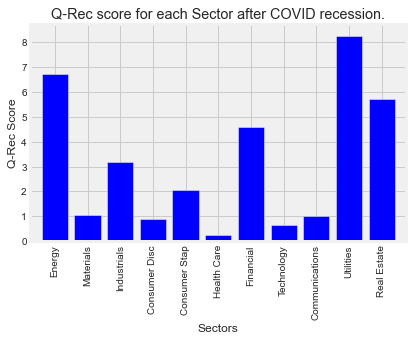

In [40]:
# Create bar chart.

sectors=Eve_to_Recovery_df["Sector"].tolist()
Q = Eve_to_Recovery_df["Q"].tolist()

x_axis=np.arange(len(Q))
plt.bar(x_axis, Q, color="b", align="center")

tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, sectors, rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Q)+0.5)

plt.title("Q-Rec score for each Sector after COVID recession.")
plt.xlabel("Sectors")
plt.ylabel("Q-Rec Score")

plt.savefig(f"QRec by Sector ({COVID_start.year}).png")  

In [22]:
Eve_to_Recovery_df.dtypes

Recession Start             object
Recession End               object
Sector                      object
Eve Price                  float64
Recovery Date               object
Days to Recover    timedelta64[ns]
dtype: object

In [23]:
# plt.figure(figsize=(15, 40))
# plt.subplots_adjust(top=1.25, bottom=1.2)

# for i, sector in enumerate(sector_list, 1):
#     plt.subplot(11, 2, i)
#     thisyear[i-1]['Adj Close'].plot()
#     plt.ylabel('Adj Close')
#     plt.xlabel(None)
#     plt.title(f"Closing Price of {sector_name[i - 1]}")
# plt.tight_layout()
# plt.savefig(f"Adj Close Change by Sectors({COVID_start.year}).png")  